GIF/image2_3Clusters_random_nor_kmeans.gif
iteration 1
k=1: 395
k=2: 157
k=3: 9448
diff682.9708731869758


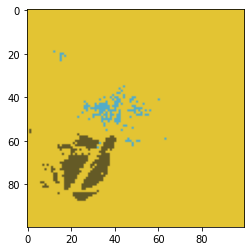

------------------------------------------------------------
iteration 2
k=1: 806
k=2: 689
k=3: 8505
diff23.48480354074837


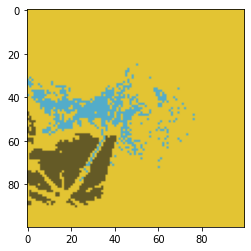

------------------------------------------------------------
iteration 3
k=1: 878
k=2: 1033
k=3: 8089
diff5.247686672398667


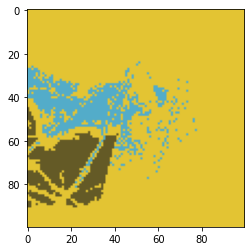

------------------------------------------------------------
iteration 4
k=1: 883
k=2: 1238
k=3: 7879
diff1.651096305347311


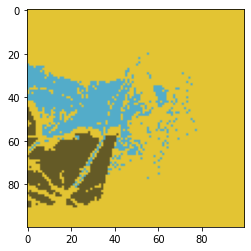

------------------------------------------------------------
iteration 5
k=1: 885
k=2: 1331
k=3: 7784
diff0.2932527504589365


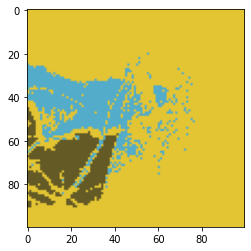

------------------------------------------------------------
iteration 6
k=1: 885
k=2: 1376
k=3: 7739
diff0.04534393293064935


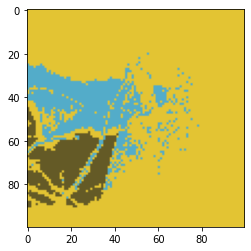

------------------------------------------------------------
iteration 7
k=1: 885
k=2: 1404
k=3: 7711
diff0.013476876092396832


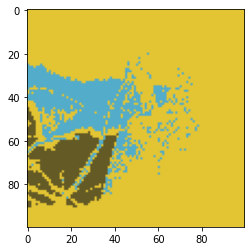

------------------------------------------------------------
iteration 8
k=1: 885
k=2: 1431
k=3: 7684
diff0.010387533113994296


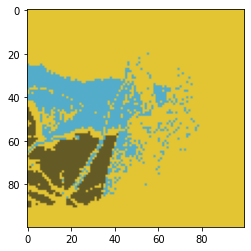

------------------------------------------------------------
iteration 9
k=1: 885
k=2: 1462
k=3: 7653
diff0.012928722537163768


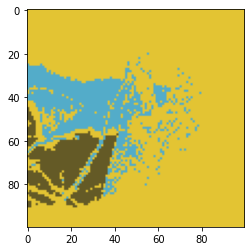

------------------------------------------------------------
iteration 10
k=1: 885
k=2: 1487
k=3: 7628
diff0.007782373275762732


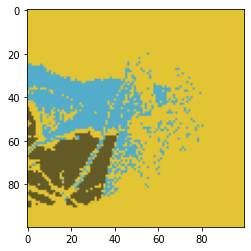

------------------------------------------------------------
iteration 11
k=1: 885
k=2: 1519
k=3: 7596
diff0.01360055332247804


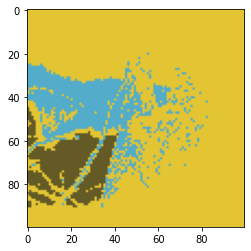

------------------------------------------------------------
iteration 12
k=1: 885
k=2: 1562
k=3: 7553
diff0.019652029375428298


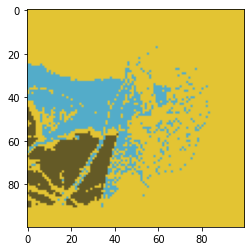

------------------------------------------------------------
iteration 13
k=1: 885
k=2: 1617
k=3: 7498
diff0.030901173997372144


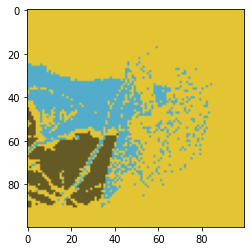

------------------------------------------------------------
iteration 14
k=1: 885
k=2: 1699
k=3: 7416
diff0.060948254635000185


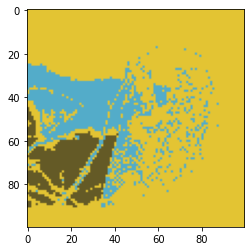

------------------------------------------------------------
iteration 15
k=1: 885
k=2: 1802
k=3: 7313
diff0.08470232282189157


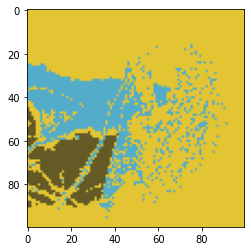

------------------------------------------------------------
iteration 16
k=1: 885
k=2: 1970
k=3: 7145
diff0.16305847889040243


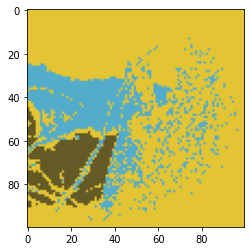

------------------------------------------------------------
iteration 17
k=1: 885
k=2: 2343
k=3: 6772
diff0.6218044403755241


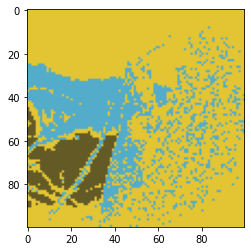

------------------------------------------------------------
iteration 18
k=1: 886
k=2: 3195
k=3: 5919
diff1.651966567937165


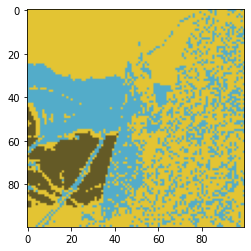

------------------------------------------------------------
iteration 19
k=1: 887
k=2: 5295
k=3: 3818
diff9.090088752916643


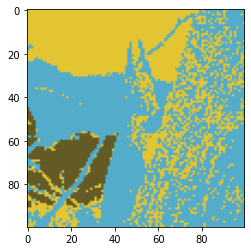

------------------------------------------------------------
iteration 20
k=1: 884
k=2: 7225
k=3: 1891
diff52.15926932710503


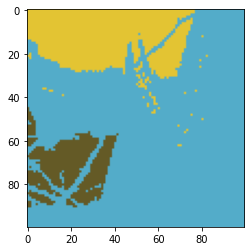

------------------------------------------------------------
iteration 21
k=1: 882
k=2: 7397
k=3: 1721
diff1.198103942471335


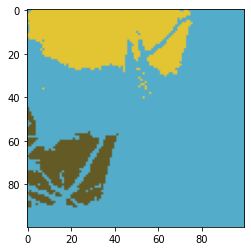

------------------------------------------------------------
iteration 22
k=1: 882
k=2: 7443
k=3: 1675
diff0.08535559953924816


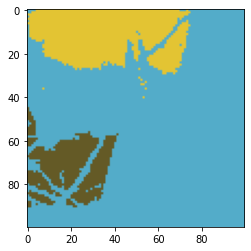

------------------------------------------------------------
iteration 23
k=1: 882
k=2: 7456
k=3: 1662
diff0.007030938950763817


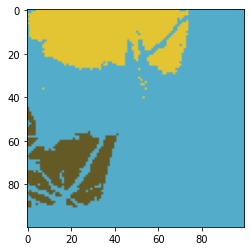

------------------------------------------------------------
iteration 24
k=1: 882
k=2: 7462
k=3: 1656
diff0.0015289621927511287


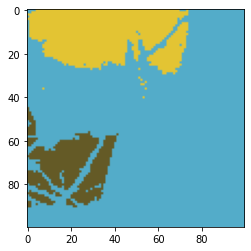

------------------------------------------------------------
iteration 25
k=1: 882
k=2: 7463
k=3: 1655
diff7.778694298067215e-05


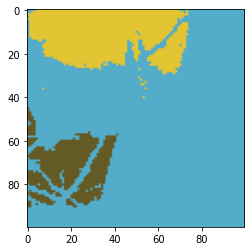

------------------------------------------------------------
iteration 26
k=1: 882
k=2: 7463
k=3: 1655
diff0.0


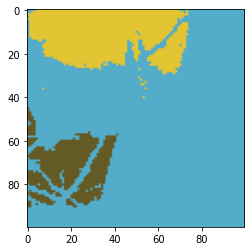

------------------------------------------------------------


In [17]:
import cv2
import os
import numpy as np
from scipy.spatial.distance import pdist,squareform
import matplotlib.pyplot as plt
from array2gif import write_gif
#----------------------------------------------------------------------------------------
def imread(img_path):
    """
    param img_path
    return a flatten image array (H*W,C)
    """
    image = cv2.imread(img_path)
    H,W,C = image.shape
    image_flatten = np.zeros((W*H,C))
    image_flatten = image.reshape(W*H,C)
    return image_flatten , H , W
#----------------------------------------------------------------------------------------
def precomputed_kernel(X,gamma_spatial,gamma_color):
    """
    kernel function: k(x,x')= exp(-r_s*||S(x)-S(x')||**2)* exp(-r_c*||C(x)-C(x')||**2)
    X: (H*W=10000,rgb=3) array
    """
    n = len(X)
    
    S = np.zeros((n,2))
    for i in range(n):
        S[i] = [i//100,i%100]
    spatial = np.exp(-gamma_spatial*pdist(S,'sqeuclidean'))
    spatial = squareform(spatial)

    color = np.exp(-gamma_color*pdist(X,'sqeuclidean'))
    color = squareform(color)
    
    answer_kernel = spatial * color 
    return answer_kernel
#----------------------------------------------------------------------------------------
def initial_mean(X,k,initType):
    """
    X : ( H*W , 3 features)
    k : k klusters
    initType : 'random' , 'pick' , 'k_means_plusplus'
    Cluster : (k,3)
    
    """
    Cluster = np.zeros((k,X.shape[1]))
    
    if initType == 'k_means_plus_plus':
        
        #randomly choose one to be a cluster_mean
        Cluster[0] = X[np.random.randint(low=0,high=X.shape[0],size=1),:]
        
        #choose another k-1 cluster_mean
        for c in range(1,k):
            Dist_matrix = np.zeros((len(X),c))
            for i in range(len(X)):
                for j in range(c):
                    Dist_matrix[i,j] = np.sqrt(np.sum((X[i]-Cluster[j])**2))            
            #這邊應該要用先對橫向找到最小值(計算所有點到其最近的質心的距離)
            #使用輪盤法找到下一個質心
            #https://zhuanlan.zhihu.com/p/32375430
            Dist_min=np.min(Dist_matrix,axis=1)
            sum=np.sum(Dist_min)*np.random.rand()
            for i in range(len(X)):
                sum-=Dist_min[i]
                if sum<=0:
                    Cluster[c]=X[i]
                    break       
    if initType == 'random_nor':
        X_mean = np.mean(X,axis=0)
        X_std  = np.std(X,axis =0)
        for i in range(X.shape[1]):
            Cluster[:,i] = np.random.normal(X_mean[i],X_std[i],size = k)
            
    if initType =='random':
        random_pick=np.random.randint(low=0,high=X.shape[0],size=k)
        Cluster=X[random_pick,:]
        
    return Cluster
#----------------------------------------------------------------------------------------
colormap= np.random.choice(range(256),size=(100,3))
def visualize(X,k,H,W,colormap):
    """
    """
    colors = colormap[:k,:]
    res = np.zeros((H,W,3))
    for h in range(H):
        for w in range(W):
            res[h,w,:] = colors[X[h*W+w]]
            
    return res.astype(np.uint8)
#----------------------------------------------------------------------------------------
def k_means(X,k,H,W,initType='random',gifPath='default.gif'):
    """
    Want to do k klusters
    X : ( H*W , 3 features )
    k : k klusters
    
    """
    EPS = 1e-9
    Mean = initial_mean(X,k,initType)
    #Classes of each Xi
    C = np.zeros(len(X),dtype = np.uint8)
    segments = []
    
    diff = 1e9
    count = 1 
    while diff>EPS:
        # E-step
        for i in range(len(X)):
            dist = []
            for j in range(k):
                dist.append(np.sqrt(np.sum((X[i]-Mean[j])**2)))
            C[i] = np.argmin(dist)
        
        #M-step
        New_Mean = np.zeros(Mean.shape)
        for i in range(k):
            belong = np.argwhere(C==i).reshape(-1)
            for j in belong:
                New_Mean[i] = New_Mean[i] + X[j]
            if len(belong)>0:
                New_Mean[i] = New_Mean[i]/len(belong)
        diff = np.sum((New_Mean - Mean)**2)
        Mean = New_Mean
        
        #visualize
        segment = visualize(C,k,H,W,colormap)
        segments.append(segment)
        print('iteration {}'.format(count))
        for i in range(k):
            print('k={}: {}'.format(i+1 , np.count_nonzero(C==i)))
        print('diff{}'.format(diff))
        

        plt.clf()
        plt.imshow(cv2.cvtColor(segment, cv2.COLOR_BGR2RGB))
        plt.pause(0.001)
        print('------------------------------------------------------------')
        
        count =count+1
    return C , segments
#----------------------------------------------------------------------------------------
def save_gif(segments,gif_path):
    for i in range(len(segments)):
        segments[i] = segments[i].transpose(1,0,2)
    write_gif(segments,gif_path , fps = 2)
#----------------------------------------------------------------------------------------
    



if __name__ == '__main__':
    img_path = 'image2.png' 
    image_flatten , H , W = imread(img_path)
    
    gamma_spatial = 0.001
    gamma_color   = 0.001
    
    k = 3  # k clusters
    k_means_initType='k_means_plus_plus'
    k_means_initType='random_nor'
    #k_means_initType ='random'
    gif_dir = './GIF'
    gif_path=os.path.join("GIF/%s_%sClusters_%s_kmeans.gif"%(img_path.split('.')[0],k,k_means_initType))
    if not os.path.isdir(gif_dir):
        os.mkdir(gif_dir)
    print(gif_path)
    kernel = precomputed_kernel(image_flatten,gamma_spatial,gamma_color)
    belongings , segments = k_means(kernel,k,H,W,initType=k_means_initType,gifPath=gif_path)
    save_gif(segments,gif_path)
    

    